In [1]:
import pandas as pd
import numpy as np

In [2]:
state = "CA"

if state == "CA":
    get_rcv_nonrcv = pd.read_csv('../data/ca-cities.csv', usecols = ['RCV', 'city_ascii'])
else:
    get_rcv_nonrcv = pd.read_csv('../data/cities.csv', usecols = ['RCV', 'city_ascii'])
    
get_rcv_nonrcv = get_rcv_nonrcv.rename(columns ={"city_ascii": "Residence_Addresses_City"})
get_rcv_nonrcv['RCV'] = get_rcv_nonrcv['RCV'].fillna(0) 
print(get_rcv_nonrcv.shape)
get_rcv_nonrcv.head()

(496, 2)


,RCV,Residence_Addresses_City
0,0.0,Los Angeles
1,1.0,San Francisco
2,0.0,San Diego
3,0.0,Riverside
4,0.0,Sacramento


In [3]:
if state == "CA":
    filepath = '../data/VM2--CA--2022-04-25/'
if state=='CO':
    filepath = '../data/VM2--CO--2022-04-26/'
if state=='MD':
    filepath = '../data/VM2--MD--2022-04-08/'
if state=='ME':
    filepath = '../data/VM2--ME--2022-03-02/'
if state=='MN':
    filepath = '../data/VM2--MN--2022-03-25/'
if state=='NM':
    filepath = '../data/VM2--NM--2022-03-30/'
if state == "UT":
    filepath = '../data/VM2--UT--2022-03-30/'
if state=='VT':
    filepath = '../data/VM2--VT--2022-04-20/'
    
voter_turnout_merge = pd.read_csv(f'{filepath}voter_turnout_merged_{state}.csv')
print(voter_turnout_merge.shape)

voter_turnout_merge = voter_turnout_merge.merge(get_rcv_nonrcv, on = "Residence_Addresses_City", how = "inner")
print(voter_turnout_merge.shape)
voter_turnout_merge.head()

(256, 68)
(256, 69)


,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,total_voters_college,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters,RCV
0,Oakland,2020_11_03,2020,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,...,80668.0,27989.0,71356.0,22543.0,88.456389,80.542356,47.829424,331652,172221.0,1.0
1,Oakland,2018_11_06,2018,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,...,80668.0,27989.0,59248.0,17372.0,73.446720,62.067241,48.224196,331652,130249.0,1.0
2,Oakland,2016_11_08,2016,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,...,80668.0,27989.0,60766.0,18951.0,75.328507,67.708743,46.819512,331652,135633.0,1.0
3,Oakland,2014_11_04,2014,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,...,80668.0,27989.0,38216.0,10811.0,47.374424,38.625889,51.034918,331652,75153.0,1.0
4,Oakland,2019_11_05,2019,Consolidated_General,30600.0,61476.0,37174.0,8628.0,83122.0,320.0,...,80668.0,27989.0,1076.0,177.0,1.333862,0.632391,36.245383,331652,2319.0,1.0


In [4]:
# perc_turnout_asian and other races are calculated per election date, election type and city level
# we want to aggregate at election type level and city level, so remove the those columns

def select_cols(df):
    select_df = df[[col for col in df.columns\
                    if "RCV" in col or\
                    "elec_type" in col or\
                    "voters_asian" in col or\
                    "voters_black" in col or\
                    "voters_hispanic" in col or\
                    "voters_white" in col or\
                    "voters_others" in col or\
                    "perc_turnout_asian"  in col or\
                    "perc_turnout_black"  in col or\
                    "perc_turnout_hispanic"  in col or\
                    "perc_turnout_white"  in col or\
                    "perc_turnout_others"  in col 
                   ]]
    return select_df
    
voter_turnout_merge_race = select_cols(voter_turnout_merge)

voter_turnout_merge_race.head()

,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,voted_voters_black,voted_voters_hispanic,voted_voters_others,voted_voters_white,perc_turnout_asian,perc_turnout_black,perc_turnout_hispanic,perc_turnout_others,perc_turnout_white,RCV
0,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,45891.0,26954.0,6346.0,69989.0,75.297386,74.648643,72.507667,73.551229,84.200332,1.0
1,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,35012.0,17857.0,4536.0,57872.0,48.928105,56.952307,48.036262,52.573018,69.622964,1.0
2,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,37256.0,19792.0,4560.0,57968.0,52.473856,60.602512,53.241513,52.851182,69.738457,1.0
3,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,21265.0,8235.0,2097.0,35411.0,26.617647,34.590735,22.152580,24.304590,42.601237,1.0
4,Consolidated_General,30600.0,61476.0,37174.0,8628.0,83122.0,320.0,325.0,211.0,110.0,1353.0,1.045752,0.528662,0.567601,1.274919,1.627728,1.0


### Average turnout for white, black, Hispanic, and Asian voters in local, consolidated, and general elections
-    Grouped bar graph by election type


In [5]:
def get_elec_turnout_race(df, RCV_nonRCV = False):
    if RCV_nonRCV == False:
        agg_df = df[[col for col in df.columns \
                        if "elec_type" in col or\
                        "perc_turnout_asian"  in col or\
                        "perc_turnout_black"  in col or\
                        "perc_turnout_hispanic"  in col or\
                        "perc_turnout_white"  in col or\
                        "perc_turnout_others"  in col ]]
        agg_df = agg_df.groupby('elec_type').mean().reset_index()
    if RCV_nonRCV == True:
        agg_df = df[[col for col in df.columns \
                        if "RCV" in col or\
                        "elec_type" in col or\
                        "perc_turnout_asian"  in col or\
                        "perc_turnout_black"  in col or\
                        "perc_turnout_hispanic"  in col or\
                        "perc_turnout_white"  in col or\
                        "perc_turnout_others"  in col ]]
        agg_df = agg_df.groupby(['elec_type', 'RCV']).mean().reset_index()
    return agg_df
    
elec_turnout_per_race =get_elec_turnout_race(voter_turnout_merge_race, RCV_nonRCV = False) 
elec_turnout_per_race

,elec_type,perc_turnout_asian,perc_turnout_black,perc_turnout_hispanic,perc_turnout_others,perc_turnout_white
0,Consolidated_General,5.153627,4.174897,4.375798,4.912078,7.770407
1,General,47.973849,53.762609,49.259568,49.937054,62.123949
2,Local_or_Municipal,6.421629,5.453070,5.196291,5.343373,9.752263


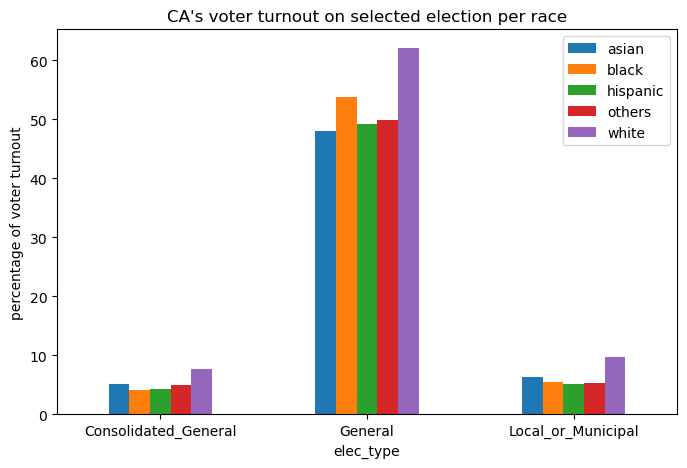

In [6]:
fig = elec_turnout_per_race.plot(x='elec_type',
                                 kind='bar',
                                 stacked=False,
                                 title=f'{state}\'s voter turnout on selected election per race',
                                 figsize=(8, 5), 
                                 rot=0)

fig.set_ylabel("percentage of voter turnout")
fig.legend(["asian", "black", "hispanic", "others", "white"]);

fig.savefig(f'{filepath}elec_turnout_per_race.jpg')

In [7]:
elec_turnout_per_race_RCV_nonRCV =get_elec_turnout_race(voter_turnout_merge_race, RCV_nonRCV = True) 
elec_turnout_per_race_RCV_nonRCV

,elec_type,RCV,perc_turnout_asian,perc_turnout_black,perc_turnout_hispanic,perc_turnout_others,perc_turnout_white
0,Consolidated_General,0.0,4.808229,3.758098,3.957891,4.567764,7.371091
1,Consolidated_General,1.0,6.026211,5.227862,5.431565,5.781926,8.779205
2,General,0.0,47.583291,53.350404,48.442347,49.036447,61.155687
3,General,1.0,49.815051,55.705862,53.112181,54.182770,66.688615
4,Local_or_Municipal,0.0,6.648233,5.646152,5.377335,5.530405,10.094404
5,Local_or_Municipal,1.0,0.076724,0.046759,0.127071,0.106488,0.172293


In [8]:
elec_turnout_per_race_RCV = elec_turnout_per_race_RCV_nonRCV[elec_turnout_per_race_RCV_nonRCV['RCV'] == 1].drop(columns = ['RCV'])
elec_turnout_per_race_nonRCV = elec_turnout_per_race_RCV_nonRCV[elec_turnout_per_race_RCV_nonRCV['RCV'] == 0].drop(columns = ['RCV'])

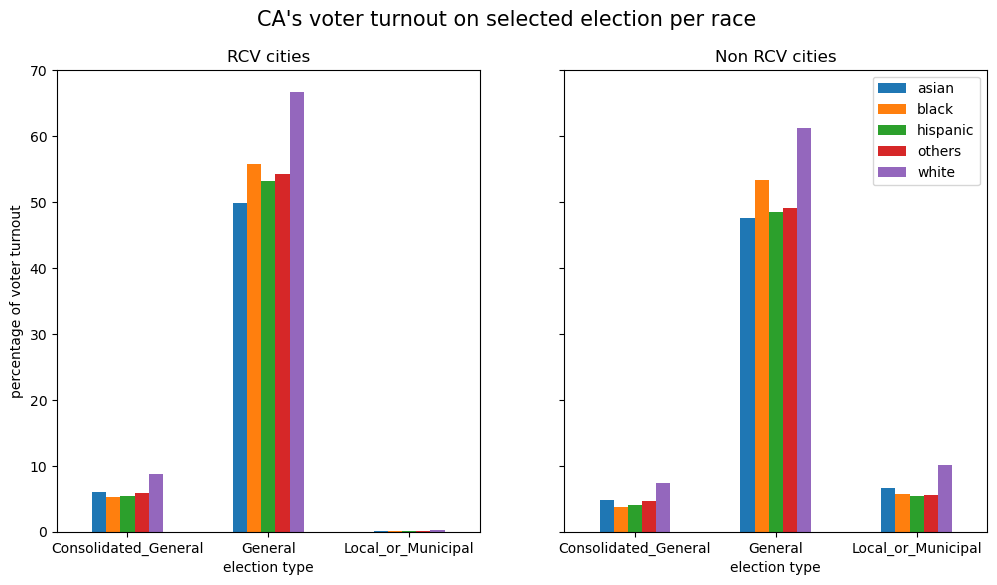

In [24]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6), sharey =True)
# plot first pandas frame in subplot style
elec_turnout_per_race_RCV.plot(x='elec_type',
                                 kind='bar',
                                 stacked=False,
                                 title='RCV cities',
                                 rot=0, 
                               ax = ax1, 
                               legend=None, 
                               xlabel ="election type", 
                               ylabel = "percentage of voter turnout")

# plot second pandas frame in subplot style
elec_turnout_per_race_nonRCV.plot(x='elec_type',
                                 kind='bar',
                                 stacked=False,
                                 title='Non RCV cities',
                                 rot=0, ax = ax2, xlabel ="election type").legend(["asian", "black", "hispanic", "others", "white"])
fig.suptitle(f'{state}\'s voter turnout on selected election per race', fontsize=15)

plt.show()

fig.savefig(f'{filepath}elec_turnout_per_race_sep.jpg')

### Average gap in turnout between white and non-white voters in local, consolidated, and general elections
-    Bar graph by election type

In [10]:
# sum up total_voters and voted_voters for all races except for white

def add_non_white(df):

    non_white_cols = [col for col in df if "elec_type" not in col and "voters_white" not in col]
    for v in ['total_voters_', 'voted_voters_']:
        df[v+'non_white'] = df[[col for col in non_white_cols if v in col ]].sum(axis =1)

    df['perc_turnout_non_white'] =  df['voted_voters_non_white']/df['total_voters_non_white']*100

    ## find the gap of voter's turnout for each record (city, election type and election date levels)
    df['gap_white_non_white'] = df['perc_turnout_white']  - df['perc_turnout_non_white']  

    return df
#voter_turnout_merge_race['voted_voters_white']/voter_turnout_merge_race['total_voters_white'] - voter_turnout_merge_race['voted_voters_non_white']/voter_turnout_merge_race['total_voters_non_white'])*100
voter_turnout_merge_race = add_non_white(voter_turnout_merge_race)

voter_turnout_merge_race.head(5)

/var/folders/ww/21cvzb4164325blmx95x6cd80000gn/T/ipykernel_9235/3631561967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[v+'non_white'] = df[[col for col in non_white_cols if v in col ]].sum(axis =1)
/var/folders/ww/21cvzb4164325blmx95x6cd80000gn/T/ipykernel_9235/3631561967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[v+'non_white'] = df[[col for col in non_white_cols if v in col ]].sum(axis =1)
/var/folders/ww/21cvzb4164325blmx95x6cd80000gn/T/ipykernel_9235/3631561967.py:9: SettingWithCo

,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,voted_voters_black,voted_voters_hispanic,voted_voters_others,...,perc_turnout_asian,perc_turnout_black,perc_turnout_hispanic,perc_turnout_others,perc_turnout_white,RCV,total_voters_non_white,voted_voters_non_white,perc_turnout_non_white,gap_white_non_white
0,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,45891.0,26954.0,6346.0,...,75.297386,74.648643,72.507667,73.551229,84.200332,1.0,137878.0,102232.0,74.146709,10.053623
1,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,35012.0,17857.0,4536.0,...,48.928105,56.952307,48.036262,52.573018,69.622964,1.0,137878.0,72377.0,52.493509,17.129455
2,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,37256.0,19792.0,4560.0,...,52.473856,60.602512,53.241513,52.851182,69.738457,1.0,137878.0,77665.0,56.328783,13.409673
3,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,21265.0,8235.0,2097.0,...,26.617647,34.590735,22.152580,24.304590,42.601237,1.0,137878.0,39742.0,28.824033,13.777204
4,Consolidated_General,30600.0,61476.0,37174.0,8628.0,83122.0,320.0,325.0,211.0,110.0,...,1.045752,0.528662,0.567601,1.274919,1.627728,1.0,137878.0,966.0,0.700619,0.927109


In [11]:
## take the average per election type
elec_turnout_per_whiteOrNot = voter_turnout_merge_race[['elec_type', 'gap_white_non_white']].groupby('elec_type').mean().reset_index()
print(elec_turnout_per_whiteOrNot)

              elec_type  gap_white_non_white
0  Consolidated_General             3.241014
1               General            13.260730
2    Local_or_Municipal             4.521636


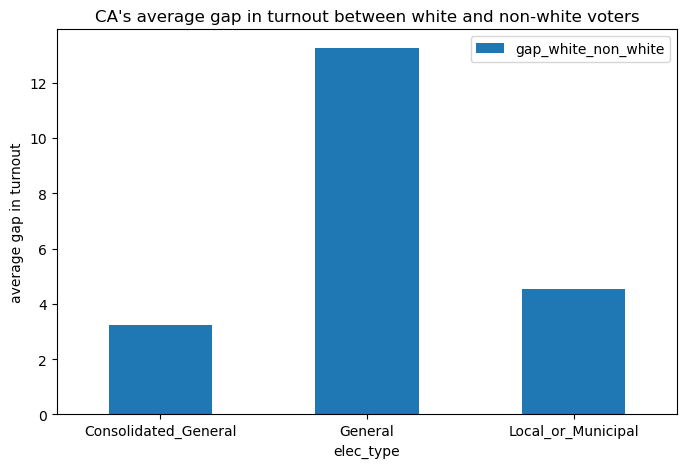

In [25]:
fig = elec_turnout_per_whiteOrNot.plot(x='elec_type',
                                       kind='bar',
                                       stacked=False,
                                       title=f'{state}\'s average gap in turnout between white and non-white voters',
                                       figsize=(8, 5),
                                       rot=0, ylabel = "average gap in turnout").get_figure()

fig.savefig(f'{filepath}elec_turnout_per_whiteOrNot.jpg')

In [26]:
elec_turnout_per_whiteOrNot_both = voter_turnout_merge_race[['elec_type', 'gap_white_non_white','RCV']].groupby(['RCV', 'elec_type']).mean().reset_index()
print(elec_turnout_per_whiteOrNot_both)
elec_turnout_per_whiteOrNot_both = elec_turnout_per_whiteOrNot_both.pivot_table('gap_white_non_white', ['elec_type'], 'RCV').reset_index()
print(elec_turnout_per_whiteOrNot_both)


   RCV             elec_type  gap_white_non_white
0  0.0  Consolidated_General             3.322234
1  0.0               General            13.109079
2  0.0    Local_or_Municipal             4.680250
3  1.0  Consolidated_General             3.035825
4  1.0               General            13.975657
5  1.0    Local_or_Municipal             0.080454
RCV             elec_type        0.0        1.0
0    Consolidated_General   3.322234   3.035825
1                 General  13.109079  13.975657
2      Local_or_Municipal   4.680250   0.080454


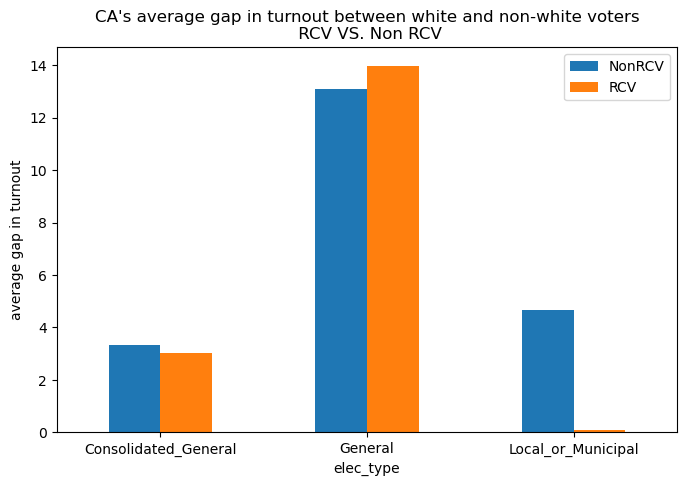

In [27]:
fig = elec_turnout_per_whiteOrNot_both.plot(x='elec_type',
                                           kind='bar',
                                           stacked=False,
                                           title=f'{state}\'s average gap in turnout between white and non-white voters\n RCV VS. Non RCV',
                                           figsize=(8, 5),
                                           rot=0, legend = None, ylabel = "average gap in turnout").\
                                        legend(["NonRCV", "RCV"]).get_figure()
fig.savefig(f'{filepath}elec_turnout_per_whiteOrNot_sep.jpg')